In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"happiness_data_FINAL_CLEANED.csv")
df.head()

,Country,Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perception,Region
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,Western Europe
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,Western Europe
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,Western Europe
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,Western Europe
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,Western Europe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                782 non-null    object 
 1   Score                  782 non-null    float64
 2   GDP                    782 non-null    float64
 3   Social Support         782 non-null    float64
 4   Life Expectancy        782 non-null    float64
 5   Freedom                782 non-null    float64
 6   Generosity             782 non-null    float64
 7   Corruption Perception  782 non-null    float64
 8   Region                 782 non-null    object 
dtypes: float64(7), object(2)
memory usage: 55.1+ KB


In [5]:
len(df['Country'].unique())

165

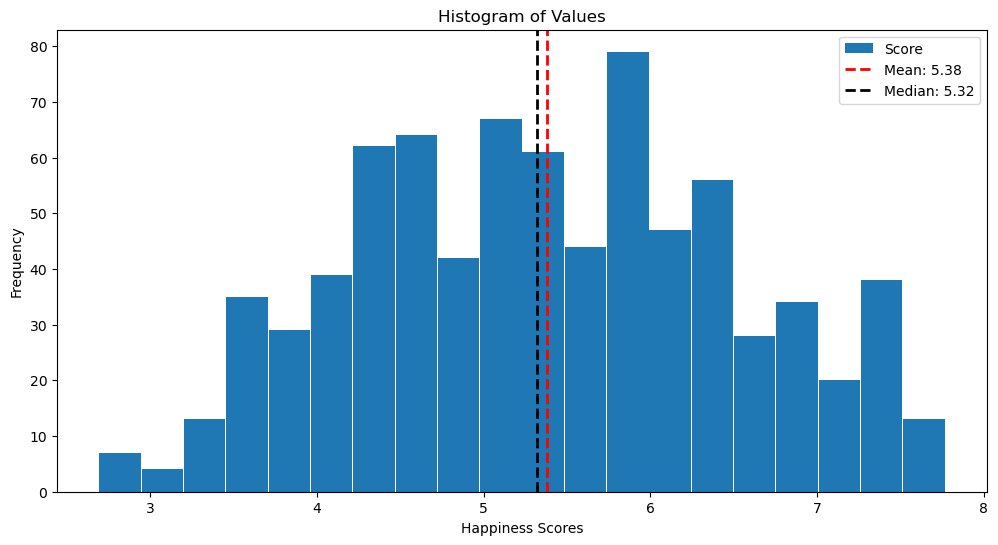

In [45]:
# Q1a. - distribution of the happiness score for each country
plt.figure(figsize=(12, 6)) # Width = 12 inches, Height = 6 inches
df['Score'].plot(kind='hist', bins=20, rwidth=0.98)

# Add a vertical line at the mean
mean_value = df['Score'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

median_value = df['Score'].median()
plt.axvline(median_value, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

plt.title('Histogram of Values')
plt.xlabel('Happiness Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [9]:
df['Score'].describe()

count    782.000000
mean       5.379018
std        1.127456
min        2.693000
25%        4.509750
50%        5.322000
75%        6.189500
max        7.769000
Name: Score, dtype: float64

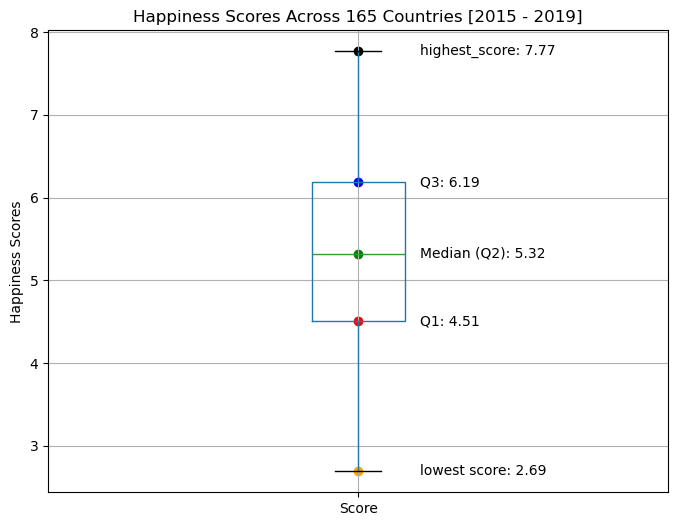

In [47]:
# Q1b.

# calculate quartiles
Q1 = df['Score'].quantile(0.25)
Q2 = df['Score'].median()
Q3 = df['Score'].quantile(0.75)
min_val = df['Score'].min()
max_val = df['Score'].max()

plt.figure(figsize=(8, 6)) # Width = 12 inches, Height = 6 inches
df.boxplot(column='Score')

# Annotate the box plot with quartiles and median
plt.scatter([1], [min_val], color='orange')
plt.text(1.1, min_val, 'lowest score: {:.2f}'.format(min_val), verticalalignment='center')

plt.scatter([1], [Q1], color='red')
plt.text(1.1, Q1, 'Q1: {:.2f}'.format(Q1), verticalalignment='center')

plt.scatter([1], [Q2], color='green')
plt.text(1.1, Q2, 'Median (Q2): {:.2f}'.format(Q2), verticalalignment='center')

plt.scatter([1], [Q3], color='blue')
plt.text(1.1, Q3, 'Q3: {:.2f}'.format(Q3), verticalalignment='center')

plt.scatter([1], [max_val], color='black')
plt.text(1.1, max_val, 'highest_score: {:.2f}'.format(max_val), verticalalignment='center')

plt.title('Happiness Scores Across 165 Countries [2015 - 2019]')
plt.ylabel('Happiness Scores')
plt.show()


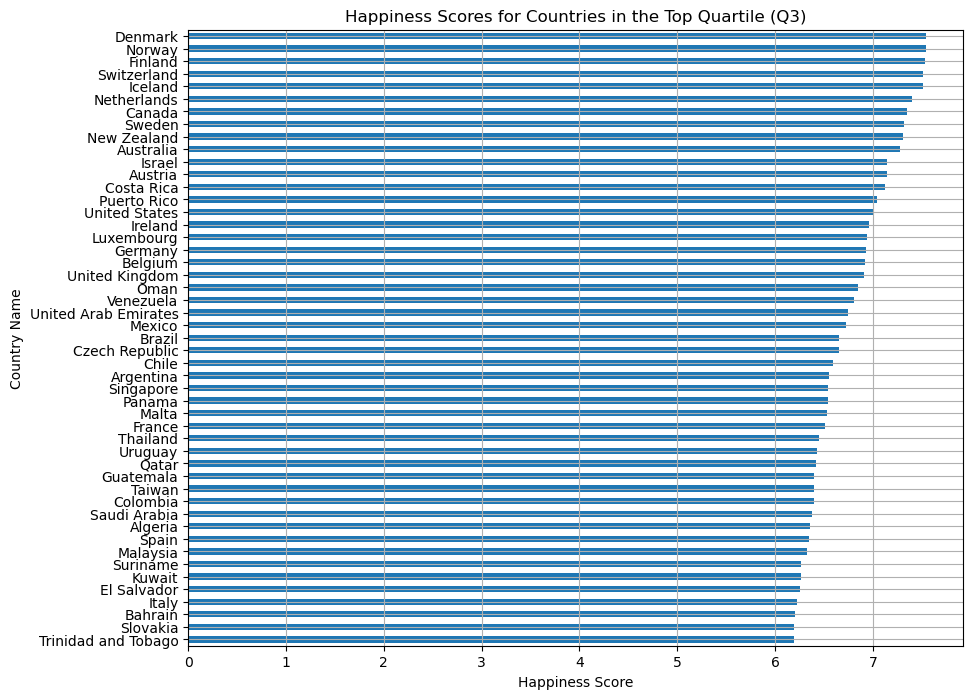

In [17]:
#Q2. Which country has the highest happiness score
# group the dataset based on country, calculate the average score and sort in descending order
# data will be shown only for the countries in the top 75% based on the Q3 value

filt = df['Score'] >= 6.19
grouped_df = df[filt].groupby('Country')['Score'].mean()
sorted_df = grouped_df.sort_values()

# visualize the data
# Create a figure with a custom size 
plt.figure(figsize=(10, 8)) # Width = 12 inches, Height = 6 inches 
sorted_df.plot(kind='barh', x='Country', y='Value', legend=False)
plt.title('Happiness Scores for Countries in the Top Quartile (Q3)')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.grid(True)
plt.show()

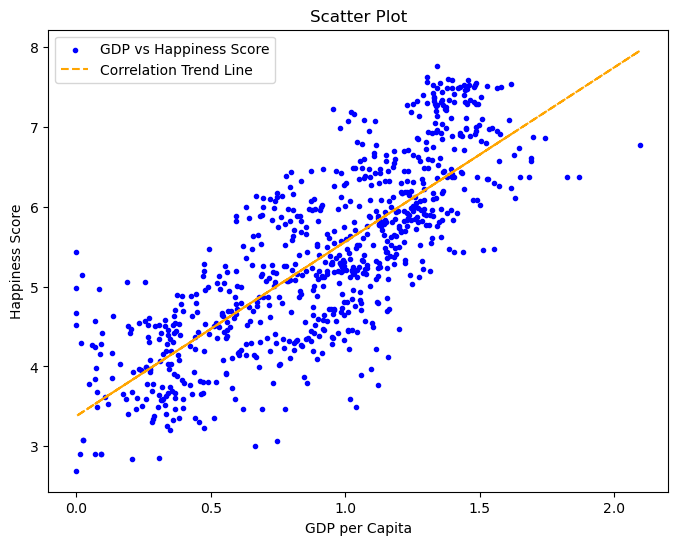

In [23]:
# Q3 - The Correlation between GDP and Happiness Score

plt.figure(figsize=(8, 6))
plt.scatter(df['GDP'], df['Score'], label='GDP vs Happiness Score', color='blue', marker='.')

# Calculate trend line for GDP vs Happiness Score
z = np.polyfit(df['GDP'], df['Score'], 1)
p = np.poly1d(z)
plt.plot(df['GDP'], p(df['GDP']), color='orange', linestyle='dashed', label='Correlation Trend Line')

# Customize plot
plt.title('Scatter Plot')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()


In [27]:
# Q3b. compute correlation coefficient
correlation = df['GDP'].corr(df['Score'])

print(correlation)


0.7892839967085105


In [13]:
# Q4. - The region of the world with the highest average happiness score.
# group the dataset based on Region
# 
region_groups = df.groupby('Region')['Score'].agg(['mean', 'median', 'count', 'sum', 'std'])
region_groups = region_groups.sort_values(by='mean', ascending=False)
region_groups

,mean,median,count,sum,std
Region,,,,,
Australia and New Zealand,7.294600,7.2965,10,72.946,0.030787
North America,7.174700,7.1985,10,71.747,0.204057
Western Europe,6.726755,6.9330,106,713.036,0.762460
Latin America and Caribbean,6.020725,6.1230,109,656.259,0.727279
Eastern Asia,5.651567,5.6545,30,169.547,0.479466
Central and Eastern Europe,5.428875,5.5025,144,781.758,0.587102
Middle East and Northern Africa,5.337208,5.2745,96,512.372,1.022185
Southeastern Asia,5.335227,5.2705,44,234.750,0.801819
Southern Asia,4.580657,4.5650,35,160.323,0.587753


In [73]:
# Q5. z-score values will be used to determine how each country
# fares within its group.

# 1. compute the mean and standard deviation for the Sub-Saharan Africa group
filt_afr = (df['Region'] == 'Sub-Saharan Africa')
df[filt_afr]['Score'].describe()

count    198.000000
mean       4.210374
std        0.627993
min        2.693000
25%        3.776500
50%        4.215500
75%        4.571000
max        6.192000
Name: Score, dtype: float64

In [ ]:
"""
from the above,
for sub-saharan africa,
group_mean = 4.210374
group_std = 0.627993
"""

In [75]:
# 2. get Nigeria's average score 
filt_ngr = (df['Country'] == 'Nigeria')
df[filt_ngr]['Score'].describe()

count    5.000000
mean     5.127400
std      0.162804
min      4.875000
25%      5.074000
50%      5.155000
75%      5.265000
max      5.268000
Name: Score, dtype: float64

In [77]:
"""
from the above,
for Nigeria,
score = 5.127400

Therefore Nigeria's z-score = (score - group_mean) / group_std
"""
score = 5.127400
group_mean = 4.210374
group_std = 0.627993
z_nigeria = (score - group_mean) / group_std
print(z_nigeria)

1.460248760734594


In [79]:
# Q5. z-score values will be used to determine how each country
# fares within its group.

# 1. compute the mean and standard deviation for the Sub-Saharan Africa group
filt_eur = (df['Region'] == 'Western Europe')
df[filt_eur]['Score'].describe()

count    106.000000
mean       6.726755
std        0.762460
min        4.857000
25%        6.304000
50%        6.933000
75%        7.399000
max        7.769000
Name: Score, dtype: float64

In [ ]:
"""
from the above,
for western europe,
group_mean = 6.726755
group_std = 0.762460
"""

In [81]:
# 2. get United Kingdom's average score 
filt_uk = (df['Country'] == 'United Kingdom')
df[filt_uk]['Score'].describe()

count    5.000000
mean     6.910000
std      0.208342
min      6.714000
25%      6.725000
50%      6.867000
75%      7.054000
max      7.190000
Name: Score, dtype: float64

In [83]:
"""
from the above,
for United Kingdom,
score = 6.910000

Therefore UK's z-score = (score - group_mean) / group_std
"""
score = 6.910000
group_mean = 6.726755
group_std = 0.762460
z_united_kingdom = (score - group_mean) / group_std
print(z_united_kingdom)

0.2403339191564152


In [ ]:
#Q5 - bringing it all together.
"""
Nigeria_score = 5.127400, approx. 5.13
UK_score = 6.91
=====================

z_nigeria = 1.460248760734594, approx. 1.46
z_united_kingdom = 0.2403339191564152, approx. 0.24
=====================

Although UK_score appears higher than Nigeria_score, 
comparing the raw scores is like comparing the proverbial Apples and Oranges because
of intrinsic differences between both countries - using sports as an example, male athletes don't compare
with female athletes!

Hence, the z-scores allow for comparison with each sub-group.

z_nigeria being 1.46 means Nigeria is 1.46 standard deviations from the
average happiness in the Sub-saharan Africa group. 
Nigeria ranks among the happiest countries
in its region.

z_united_kingdom being 0.24 means UK is 0.24 standard deviations from the 
average happiness in the Western Europe group.
United Kingdom is also happy in its region but no where close to 1 standard deviation
above the average happiness in its region.

CONCLUSION
From the foregoing, Nigeria is happier than the UK.
"""